# План<a id="plan"></a>
[1. Постановка задачи](#1)

[2. Знакомство с данными, базовый анализ и расширение данных](#2)

[Задание 2.1](#2.1)

[Задание 2.2](#2.2)

[Задание 2.3](#2.3)

[Задание 2.4](#2.4)

[Задание 2.5](#2.5)

[Задание 2.6](#2.6)

[Задание 2.7](#2.7)

[Задание 2.8](#2.8)

[Задание 2.9](#2.9)

[Задание 2.10](#2.10)

[3. Разведывательный анализ данных (EDA)](#3)

[Задание 3.1](#3.1)

[Задание 3.2](#3.2)

[Задание 3.3](#3.3)

[Задание 3.4](#3.4)

[Задание 3.5](#3.5)

[Задание 3.6](#3.6)

[Задание 3.7](#3.7)

[3_дополнительно](#3_д)

[4. Отбор и преобразование признаков](#4)

[Задание 4.1](#4.1)

[Задание 4.2](#4.2)

[Задание 4.3](#4.3)

[Задание 4.4](#4.4)

[Задание 4.5](#4.5)

[5. Решение задачи регрессии: линейная регрессия и деревья решений](#5)

[Задание 5.1](#5.1)

[Задание 5.2](#5.2)

[Задание 5.3](#5.3)

[Задание 5.4](#5.4)

[Задание 5.5](#5.5)

[6. Решение задачи регрессии: ансамблевые методы и построение прогноза](#6)

[Задание 6.1](#6.1)

[Задание 6.2](#6.2)

[Задание 6.3](#6.3)

[Задание 6.4](#6.4)

[Задание 6.5](#6.5)

[В качестве бонуса**](#бонус)

## 1. Постановка задачи<a id="1"></a>

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


[План](#plan)

## 2. Знакомство с данными, базовый анализ и расширение данных<a id="2"></a>

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
from sklearn.pipeline import make_pipeline
import joblib

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

In [3]:
# Посморим на типы данных
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


pickup_datetime, dropoff_datetime следует перевести в datetime, в остальном - хорошо

[План](#plan)

### Задание 2.1<a id="2.1"></a>
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
# ваш код здесь
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')
# проверка
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [5]:
print (f'''от {taxi_data['pickup_datetime'].min()}, до {taxi_data['pickup_datetime'].max()}''')

от 2016-01-01 00:00:17, до 2016-06-30 23:59:39


[План](#plan)

### Задание 2.2<a id="2.2"></a>
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [6]:
# ваш код здесь
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


Пропуски отсутсвуют

[План](#plan)

### Задание 2.3<a id="2.3"></a>
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [7]:
# ваш код здесь
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


2 таксопака

до 9 пассажиров включительно

длительность поездки: средняя - 959 сек, медианная - 662 сек

длительность поездки: мин - 1 сек, макс - 3526282 сек


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


[План](#plan)

### Задание 2.4<a id="2.4"></a>
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [8]:
# ваш код здесь
#describe(include=['object']) # если только для категориальных
def add_datetime_features(df_in):
    df_in['pickup_date'] =  df_in['pickup_datetime'].dt.date
    df_in['pickup_date'] = pd.to_datetime(df_in['pickup_date'], format = '%Y-%m-%d')
    df_in['pickup_hour'] = df_in['pickup_datetime'].dt.hour
    df_in['pickup_day_of_week'] = df_in['pickup_datetime'].dt.day_name()#dayofweek + 1 
    #выводим наименование дня недели, т.к. в дальнейшем нам потребуется именно поле с наименованием дня (для OHE)
    return df_in

In [9]:
taxi_data = add_datetime_features(taxi_data)
# проверка
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday


In [10]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  datetime64[ns]
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [11]:
# Ответы на вопросы
flag = taxi_data['pickup_day_of_week'] == 'Saturday'
print('Поездок в субботу:', taxi_data[flag]['id'].count())

print('В среднем поездок за день:', round(taxi_data.groupby("pickup_date")['id'].count().mean()))

Поездок в субботу: 220868
В среднем поездок за день: 8015


[План](#plan)

### Задание 2.5<a id="2.5"></a>
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [12]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
holiday_data['date'] = pd.to_datetime(holiday_data['date'], format = '%Y-%m-%d')

In [13]:
holiday_data

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day
7,Monday,2016-07-04,Independence Day
8,Monday,2016-09-05,Labor Day
9,Monday,2016-10-10,Columbus Day


In [14]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
holiday_data['date'] = pd.to_datetime(holiday_data['date'], format = '%Y-%m-%d')
# ваш код здесь
def add_holiday_features(df_work, df_holiday):
    df_work = df_work.merge(df_holiday['date'],
        left_on = 'pickup_date', 
        right_on = 'date', how = 'left')
    
    flag = df_work['date'].isna() == False
    df_work.loc[flag, 'pickup_holiday'] = 1
    df_work.loc[~flag, 'pickup_holiday'] = 0
    df_work['pickup_holiday'] = df_work['pickup_holiday'].astype(int)
    df_work = df_work.drop(columns = ['date'])
    
    return df_work

In [15]:
taxi_data = add_holiday_features(taxi_data, holiday_data)

In [16]:
flag = taxi_data['pickup_holiday'] == 1
taxi_data[flag]
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,Friday,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,Sunday,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,Friday,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,Tuesday,0


In [17]:
# Ответы на вопросы
flag = taxi_data['pickup_holiday'] == 1
print('Медианная длит поездки в праздники:', round(taxi_data[flag]["trip_duration"].median()))

Медианная длит поездки в праздники: 585


[План](#plan)

### Задание 2.6<a id="2.6"></a>
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [18]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')

In [19]:
def add_osrm_features(df_work, osrm):
        df1 = df_work.merge(osrm[['id', 'total_distance','total_travel_time','number_of_steps']],
            left_on = 'id', 
            right_on = 'id', how = 'left')
        return df1

In [20]:
taxi_data = add_osrm_features(taxi_data, osrm_data)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,0,1614.9,140.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,Friday,0,2234.6,311.7,8.0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,Sunday,0,7638.0,589.6,11.0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,Friday,0,9871.5,642.9,10.0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,Tuesday,0,1628.3,161.6,7.0


In [21]:
# Ответы на вопросы:
print('Разница в медианной длит поездки данные / OSRM:', \
      round(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()))
print ('Кол-во пропусков после объединения с OSRM:', taxi_data['total_distance'].isna().sum())

Разница в медианной длит поездки данные / OSRM: 372
Кол-во пропусков после объединения с OSRM: 1


In [22]:
# Удалим единственный пропуск
flag = taxi_data['total_distance'].isna() == True
taxi_data = taxi_data.drop(taxi_data[flag].index)
print ('Кол-во пропусков после объединения с OSRM:', taxi_data['total_distance'].isna().sum())

Кол-во пропусков после объединения с OSRM: 0


In [23]:
def get_haversine_distance(df_work):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (df_work['pickup_latitude'], df_work['pickup_longitude'], \
                                           df_work['dropoff_latitude'], df_work['dropoff_longitude']))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(df_work):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (df_work['pickup_latitude'], df_work['pickup_longitude'], \
                                           df_work['dropoff_latitude'], df_work['dropoff_longitude']))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

[План](#plan)

### Задание 2.7<a id="2.7"></a>
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [24]:
# ваш код здесь
def add_geographical_features(df_work):
    df_work['haversine_distance'] = df_work.apply(get_haversine_distance, axis=1)
    df_work['direction'] = df_work.apply(get_haversine_distance, axis=1)   
  
    return df_work

In [25]:
taxi_data = add_geographical_features(taxi_data)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday,0,2009.1,164.9,5.0,1.498521,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday,0,2513.2,332.0,6.0,1.805507,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday,0,11060.8,767.6,16.0,6.385098,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday,0,1779.4,235.8,4.0,1.485498,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday,0,1614.9,140.1,5.0,1.188588,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,13,Friday,0,2234.6,311.7,8.0,1.225080,1.225080
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,7,Sunday,0,7638.0,589.6,11.0,6.049836,6.049836
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,6,Friday,0,9871.5,642.9,10.0,7.824606,7.824606
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016-01-05,15,Tuesday,0,1628.3,161.6,7.0,1.092564,1.092564


In [26]:
# Ответы на вопросы:
print('Медианное расстояние Хаверсина', round(taxi_data['haversine_distance'].median(), 2))

Медианное расстояние Хаверсина 2.09


[План](#plan)

### Задание 2.8<a id="2.8"></a>
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [27]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь
def add_cluster_features(df_work, kmeans):
    coords = np.hstack((df_work[['pickup_latitude', 'pickup_longitude']],
                    df_work[['dropoff_latitude', 'dropoff_longitude']]))
    df_work['geo_cluster'] = kmeans.predict(coords)
    return df_work

taxi_data = add_cluster_features(taxi_data, kmeans)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# Ответы на вопросы:
print('Поездок содержится в наименьшем по размеру географическом кластере:', \
          taxi_data.groupby("geo_cluster")['id'].count().min())

Поездок содержится в наименьшем по размеру географическом кластере: 2


[План](#plan)

### Задание 2.9<a id="2.9"></a>
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [29]:
weather_data = pd.read_csv('data/weather_data.csv')

weather_data['time'] = pd.to_datetime(weather_data['time'], format = '%Y-%m-%d %H:%M:%S')
weather_data['date'] =  weather_data['time'].dt.date
weather_data['date'] = pd.to_datetime(weather_data['date'], format = '%Y-%m-%d')
weather_data['hour'] = weather_data['time'].dt.hour
weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         8787 non-null   datetime64[ns]
 1   temperature  8787 non-null   float64       
 2   windchill    2295 non-null   float64       
 3   heat index   815 non-null    float64       
 4   humidity     8787 non-null   float64       
 5   pressure     8556 non-null   float64       
 6   dew Point    8787 non-null   float64       
 7   visibility   8787 non-null   float64       
 8   wind dir     8787 non-null   object        
 9   wind speed   8787 non-null   float64       
 10  gust speed   8787 non-null   float64       
 11  precip       8787 non-null   float64       
 12  events       8787 non-null   object        
 13  conditions   8787 non-null   object        
 14  date         8787 non-null   datetime64[ns]
 15  hour         8787 non-null   int64         
dtypes: dat

In [30]:
def add_weather_features(df_work, weather):
        df1 = df_work.merge(weather[['date', 'hour','temperature','visibility', 'wind speed', 'precip',  'events']],
            left_on = ['pickup_date', 'pickup_hour'],
            right_on = ['date', 'hour'], how = 'left')
        return df1

In [31]:
taxi_data = add_weather_features(taxi_data, weather_data)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,haversine_distance,direction,geo_cluster,date,hour,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498521,1.498521,0,2016-03-14,17.0,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805507,1.805507,3,2016-06-12,0.0,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385098,6.385098,3,2016-01-19,11.0,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.485498,1.485498,3,2016-04-06,19.0,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.188588,1.188588,0,2016-03-26,13.0,9.4,16.1,9.3,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,1.225080,1.225080,5,2016-04-08,13.0,7.8,16.1,11.1,0.0,None
1458639,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,6.049836,6.049836,0,2016-01-10,7.0,7.2,2.8,18.5,8.1,Rain
1458640,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,7.824606,7.824606,3,2016-04-22,6.0,18.3,16.1,0.0,0.0,None
1458641,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1.092564,1.092564,5,2016-01-05,15.0,-2.8,16.1,9.3,0.0,None


In [32]:
# Ответы на вопросы
flag = taxi_data['events'] == 'Snow'
print('Поездок в снежную погоду:', taxi_data[flag]['id'].count())

print('Доля пропусков в столблцах с погодными условиями в общем кол-ве наблюдений:', \
      round(taxi_data['events'].isna().sum() / taxi_data['id'].count() * 100 , 2))

Поездок в снежную погоду: 13126
Доля пропусков в столблцах с погодными условиями в общем кол-ве наблюдений: 0.82


[План](#plan)

### Задание 2.10<a id="2.10"></a>
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [33]:
# ваш код здесь
def fill_null_weather_data(df_work):
    for col in ['temperature', 'visibility', 'wind speed', 'precip']:
        df_work[col] = df_work[col].fillna(df_work.groupby('pickup_date')[col].transform('median'))
    df_work['events'] = df_work['events'].fillna('None')
    return df_work

In [34]:
taxi_data = fill_null_weather_data(taxi_data)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,haversine_distance,direction,geo_cluster,date,hour,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498521,1.498521,0,2016-03-14,17.0,4.4,8.0,27.8,0.3,None
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805507,1.805507,3,2016-06-12,0.0,28.9,16.1,7.4,0.0,None
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385098,6.385098,3,2016-01-19,11.0,-6.7,16.1,24.1,0.0,None
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.485498,1.485498,3,2016-04-06,19.0,7.2,16.1,25.9,0.0,None
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.188588,1.188588,0,2016-03-26,13.0,9.4,16.1,9.3,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,1.225080,1.225080,5,2016-04-08,13.0,7.8,16.1,11.1,0.0,None
1458639,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,6.049836,6.049836,0,2016-01-10,7.0,7.2,2.8,18.5,8.1,Rain
1458640,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,7.824606,7.824606,3,2016-04-22,6.0,18.3,16.1,0.0,0.0,None
1458641,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1.092564,1.092564,5,2016-01-05,15.0,-2.8,16.1,9.3,0.0,None


In [35]:
# Ответу на вопросы
print('Медиана в столбце temperature после заполнения пропусков:', round(taxi_data['temperature'].median(), 1))

Медиана в столбце temperature после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


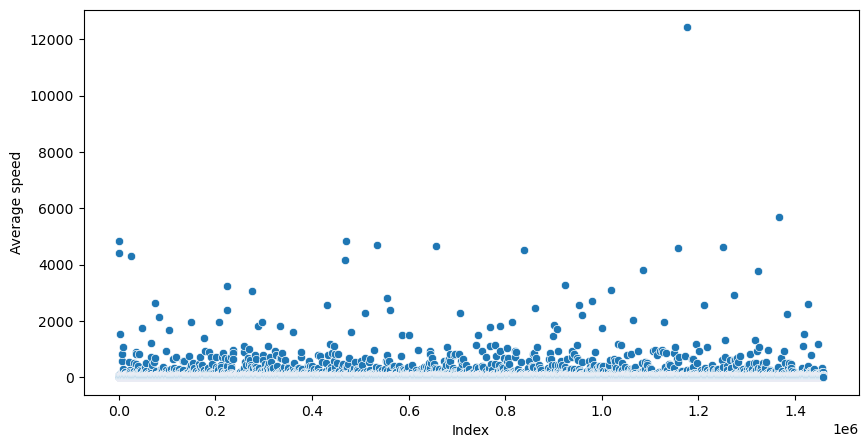

In [36]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


[План](#plan)

### Задание 2.11<a id="2.11"></a>
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [37]:
# ваш код здесь
flag = taxi_data['trip_duration'] > 24 * 60 * 60
print('Выбросы о признаку длительности:', taxi_data[flag]['id'].count())
taxi_data = taxi_data.drop(index = taxi_data[flag].index)

Выбросы о признаку длительности: 4


In [38]:
taxi_data['avg_speed'] = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
flag = taxi_data['avg_speed'] > 300
print('Скорость превышает 300 км/ч:', taxi_data[flag]['id'].count())
taxi_data = taxi_data.drop(index = taxi_data[flag].index)

Скорость превышает 300 км/ч: 406


[План](#plan)

## 3. Разведывательный анализ данных (EDA)<a id="3"></a>

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [39]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

[План](#plan)

### Задание 3.1<a id="3.1"></a>
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

Text(0.5, 1.0, 'Ящик с усами')

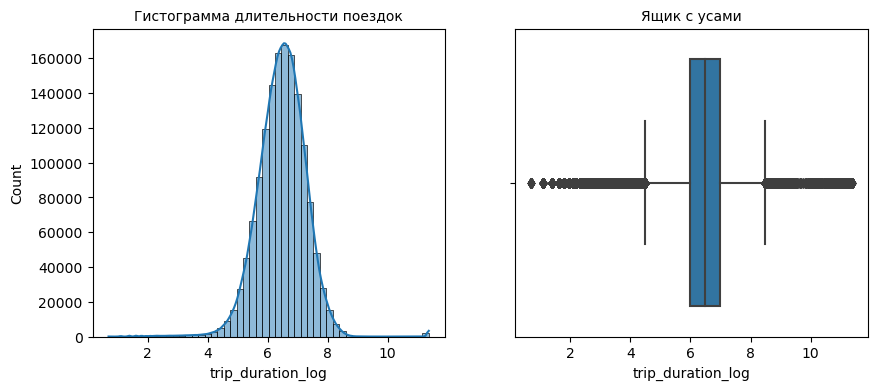

In [40]:
# ваш код здесь
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(
    data=taxi_data,
    x='trip_duration_log',
    bins=50,
    kde=True,
    ax=axes[0]
)
sns.boxplot(
    data=taxi_data,
    x='trip_duration_log',
    ax=axes[1]
)
axes[0].set_title('Гистограмма длительности поездок', fontsize=10)
axes[1].set_title('Ящик с усами', fontsize=10)

In [41]:
# Визуально походит на нормальное распределение
# В хвостах весьма много данных
shapiro_test = stats.shapiro(taxi_data['trip_duration_log'])
print(shapiro_test)
normal_test = stats.normaltest(taxi_data['trip_duration_log'])
print(normal_test)

ShapiroResult(statistic=0.9701657295227051, pvalue=0.0)
NormaltestResult(statistic=138350.16605405, pvalue=0.0)


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Распределение даже близко нормальным не является (оба теста показали, что нуевую гипотезу отвергаем)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.09278851747512817, pvalue=0.0)
NormaltestResult(statistic=3500640.4061198863, pvalue=0.0)


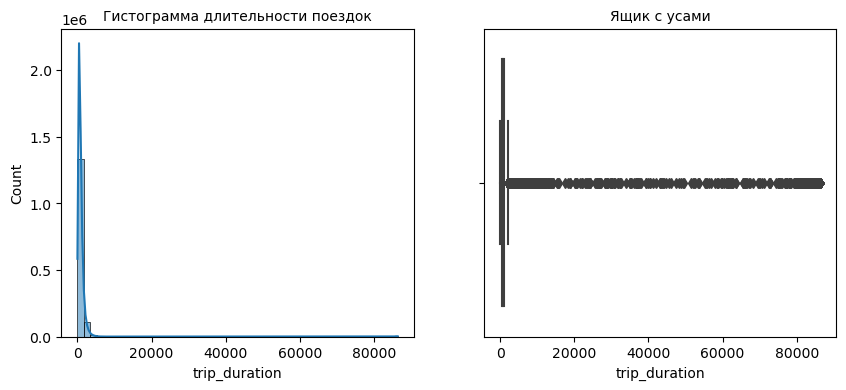

In [42]:
#интересно посмотреть на распределение времени поездки в обычном масштабе (дало ли чот-то логарифмирование)
# даже визуально логарифмирование оказало положительное влияние на распределение
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(
    data=taxi_data,
    x='trip_duration',
    bins=50,
    kde=True,
    ax=axes[0]
)
sns.boxplot(
    data=taxi_data,
    x='trip_duration',
    ax=axes[1]
)
axes[0].set_title('Гистограмма длительности поездок', fontsize=10)
axes[1].set_title('Ящик с усами', fontsize=10)

shapiro_test = stats.shapiro(taxi_data['trip_duration'])
print(shapiro_test)
normal_test = stats.normaltest(taxi_data['trip_duration'])
print(normal_test)

[План](#plan)

### Задание 3.2<a id="3.2"></a>
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

In [43]:
taxi_data['vendor_id'].unique()

array([2, 1], dtype=int64)

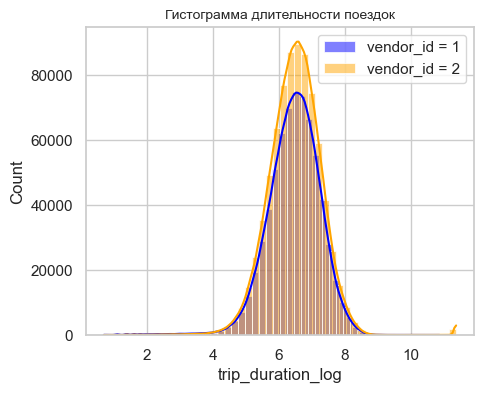

In [44]:
# ваш код здесь
flag1 = taxi_data['vendor_id'] == 1
flag2 = taxi_data['vendor_id'] == 2

sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
sns.histplot(
    data=taxi_data[flag1],
    x='trip_duration_log',
    bins=50,
    kde=True,
    alpha=0.5,  # Прозрачность 50%
    color='blue',  # Цвет гистограммы
    label='vendor_id = 1',  # Добавляем подпись по цвету
    ax=axes
)
sns.histplot(
    data=taxi_data[flag2],
    x='trip_duration_log',
    bins=50,
    kde=True,
    alpha=0.5,  # Прозрачность 50%
    color='orange',  # Цвет гистограммы
    label='vendor_id = 2',  # Добавляем подпись по цвету
    ax=axes
)
axes.set_title('Гистограмма длительности поездок', fontsize=10)
axes.legend()
plt.show()

Визульно значения разные. Проверим гипотезу

In [45]:
result_ttest = stats.ttest_ind(taxi_data[flag1]['trip_duration_log'], taxi_data[flag2]['trip_duration_log'])
print(result_ttest)

Ttest_indResult(statistic=-23.692750169694296, pvalue=4.521361795793804e-124)


Не оснований принять нулевую гипотезу о равенстве средних (это справедливо для уровень значимости близком к нулю).

Вывод: длительность поездки у таксопарков различная.

[План](#plan)

### Задание 3.3<a id="3.3"></a>
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

In [46]:
taxi_data.groupby("store_and_fwd_flag")['id'].count()

store_and_fwd_flag
N    1450192
Y       8041
Name: id, dtype: int64

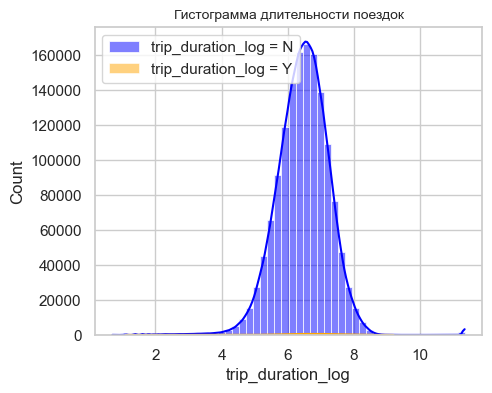

In [47]:
# ваш код здесь
flag1 = taxi_data['store_and_fwd_flag'] == 'N'
flag2 = taxi_data['store_and_fwd_flag'] == 'Y'

sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
sns.histplot(
    data=taxi_data[flag1],
    x='trip_duration_log',
    bins=50,
    kde=True,
    alpha=0.5,  # Прозрачность 50%
    color='blue',  # Цвет гистограммы
    label='trip_duration_log = N',  # Добавляем подпись по цвету
    ax=axes
)
sns.histplot(
    data=taxi_data[flag2],
    x='trip_duration_log',
    bins=50,
    kde=True,
    alpha=0.5,  # Прозрачность 50%
    color='orange',  # Цвет гистограммы
    label='trip_duration_log = Y',  # Добавляем подпись по цвету
    ax=axes
)
axes.set_title('Гистограмма длительности поездок', fontsize=10)
axes.legend()
plt.show()

In [48]:
result_ttest = stats.ttest_ind(taxi_data[flag1]['trip_duration_log'], taxi_data[flag2]['trip_duration_log'])
print(result_ttest)

Ttest_indResult(statistic=-18.743063037781166, pvalue=2.253004226444877e-78)


Нет оснований принять нулевую гипотезу.

Вывод: длительность поездки разная - по подавлюящему большинству поездок нформация не передаётся (может это тест какой был)

[План](#plan)

### Задание 3.4<a id="3.4"></a>
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

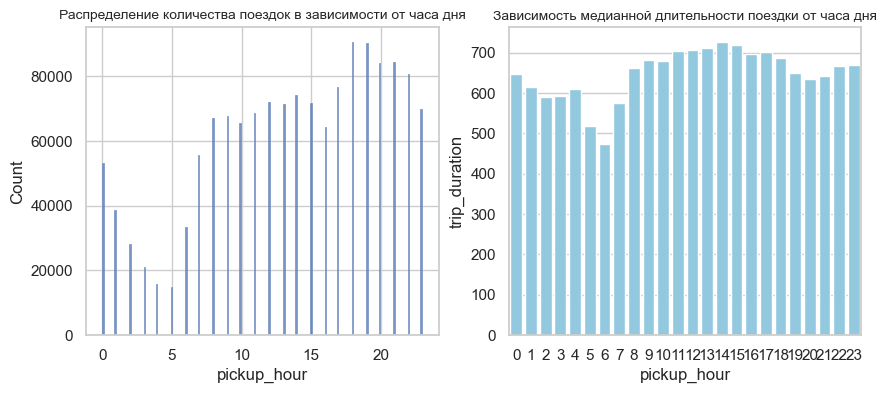

In [49]:
# ваш код здесь
sns.set(style='whitegrid')
median_trip_duration_by_hour = taxi_data.groupby("pickup_hour")['trip_duration'].median().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(
    data=taxi_data,
    x='pickup_hour',
    ax=axes[0]
)
sns.barplot(
    data=median_trip_duration_by_hour,
    x='pickup_hour', 
    y='trip_duration',
    color='skyblue',
    ax=axes[1]
)
axes[0].set_title('Распределение количества поездок в зависимости от часа дня', fontsize=10)
axes[1].set_title('Зависимость медианной длительности поездки от часа дня', fontsize=10)
plt.show()

Минимальная активность наблюдается ранним утром. Наибольшая - по окончании рабобчего дня.
Медианная длительнность поездки особо не разнится по времени (хотя явно наблюдается снижение к 6 утра).

[План](#plan)

### Задание 3.5<a id="3.5"></a>
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


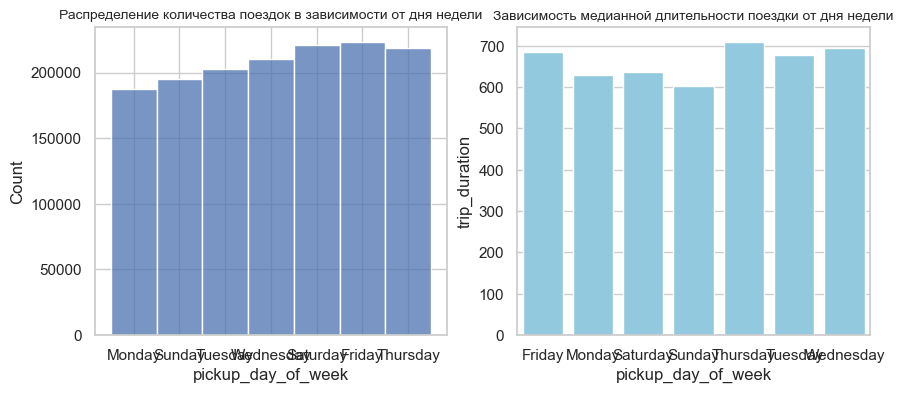

In [50]:
# ваш код здесь
sns.set(style='whitegrid')
median_trip_duration_by_hour = taxi_data.groupby("pickup_day_of_week")['trip_duration'].median().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(
    data=taxi_data,
    x='pickup_day_of_week',
    ax=axes[0]
)
sns.barplot(
    data=median_trip_duration_by_hour,
    x='pickup_day_of_week', 
    y='trip_duration',
    color='skyblue',
    ax=axes[1]
)
axes[0].set_title('Распределение количества поездок в зависимости от дня недели', fontsize=10)
axes[1].set_title('Зависимость медианной длительности поездки от дня недели', fontsize=10)
plt.show()

Наиболее длительные поездки приходятся на четверг. Наименее длительные - в воскресенье.
Интерпретировать сложно, поскольку, по моему опытту знательно (в разы) быстрее можно доехать до места назначения в выходные дни.

[План](#plan)

### Задание 3.6<a id="3.6"></a>
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

In [51]:
# ваш код здесь
pivot = taxi_data.pivot_table(
    values='trip_duration',
    index=['pickup_hour'],
    columns='pickup_day_of_week',
    aggfunc=['median'],
    fill_value=0
).reset_index()
#pivot.columns = pivot.columns.astype('string')
display(pivot)

pickup_hour median                                          \
pickup_day_of_week             Friday Monday Saturday Sunday Thursday Tuesday   
0                            0  649.0    598    685.0  675.0      609   591.0   
1                            1  600.0    567    640.0  643.0      564   584.0   
2                            2  572.0    565    610.0  604.5      576   565.0   
3                            3  578.0    600    591.0  608.0      584   568.0   
4                            4  634.0    640    610.0  598.5      595   600.5   
5                            5  532.0    519    631.0  634.0      480   455.0   
6                            6  476.0    462    508.0  554.0      471   461.0   
7                            7  578.0    575    481.0  474.0      599   586.0   
8                            8  689.0    672    489.0  460.0      721   703.0   
9                            9  743.0    705    510.0  470.0      772   755.0   
10                          10  744.0    694    542.0  506.0      772   778.0   
11                          11  754.5    702    579.0  551.0      804   806.0   
12                          12  746.0    692    618.0  594.0      799   783.5   
13                          13  712.0    673    651.5  628.0      772   768.5   
14                          14  735.0    681    660.0  667.0      811   768.0   
15                          15  759.0    676    662.0  658.5      786   741.0   
16                          16  729.5    642    655.0  672.0      757   706.0   
17                          17  712.0    645    685.0  650.0      753   713.0   
18                          18  696.0    637    678.0  641.0      729   699.5   
19                          19  669.0    575    698.0  600.5      692   631.0   
20                          20  664.0    573    669.0  585.0      682   622.0   
21                          21  666.0    597    656.0  570.0      692   634.0   
22                          22  705.0    602    690.0  586.0      709   659.0   
23                          23  717.0    612    705.0  595.5      692   633.0   

                              
pickup_day_of_week Wednesday  
0                      601.0  
1                      553.0  
2                      544.0  
3                      574.0  
4                      616.0  
5                      448.0  
6                      463.0  
7                      593.0  
8                      704.0  
9                      742.0  
10                     788.0  
11                     809.0  
12                     800.5  
13                     798.0  
14                     783.0  
15                     774.0  
16                     741.0  
17                     759.0  
18                     724.0  
19                     658.0  
20                     639.0  
21                     665.0  
22                     675.0  
23                     659.0

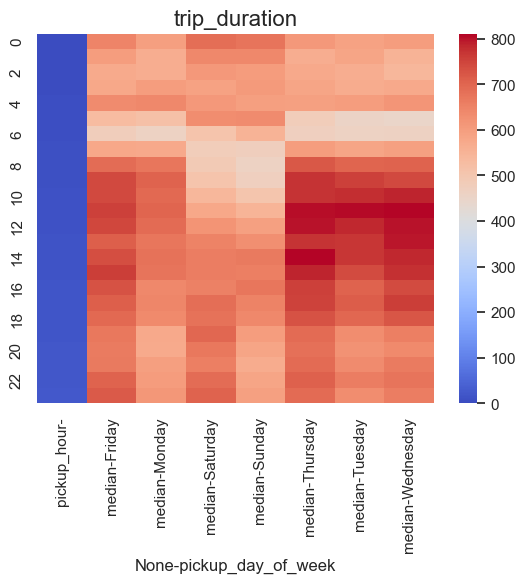

In [52]:
heatmap = sns.heatmap(data=pivot, cmap='coolwarm')
heatmap.set_title('trip_duration', fontsize=16);

Наибольшая длитеьность поездок приходтся на час дня в среду и четверг.

[План](#plan)

### Задание 3.7<a id="3.7"></a>
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


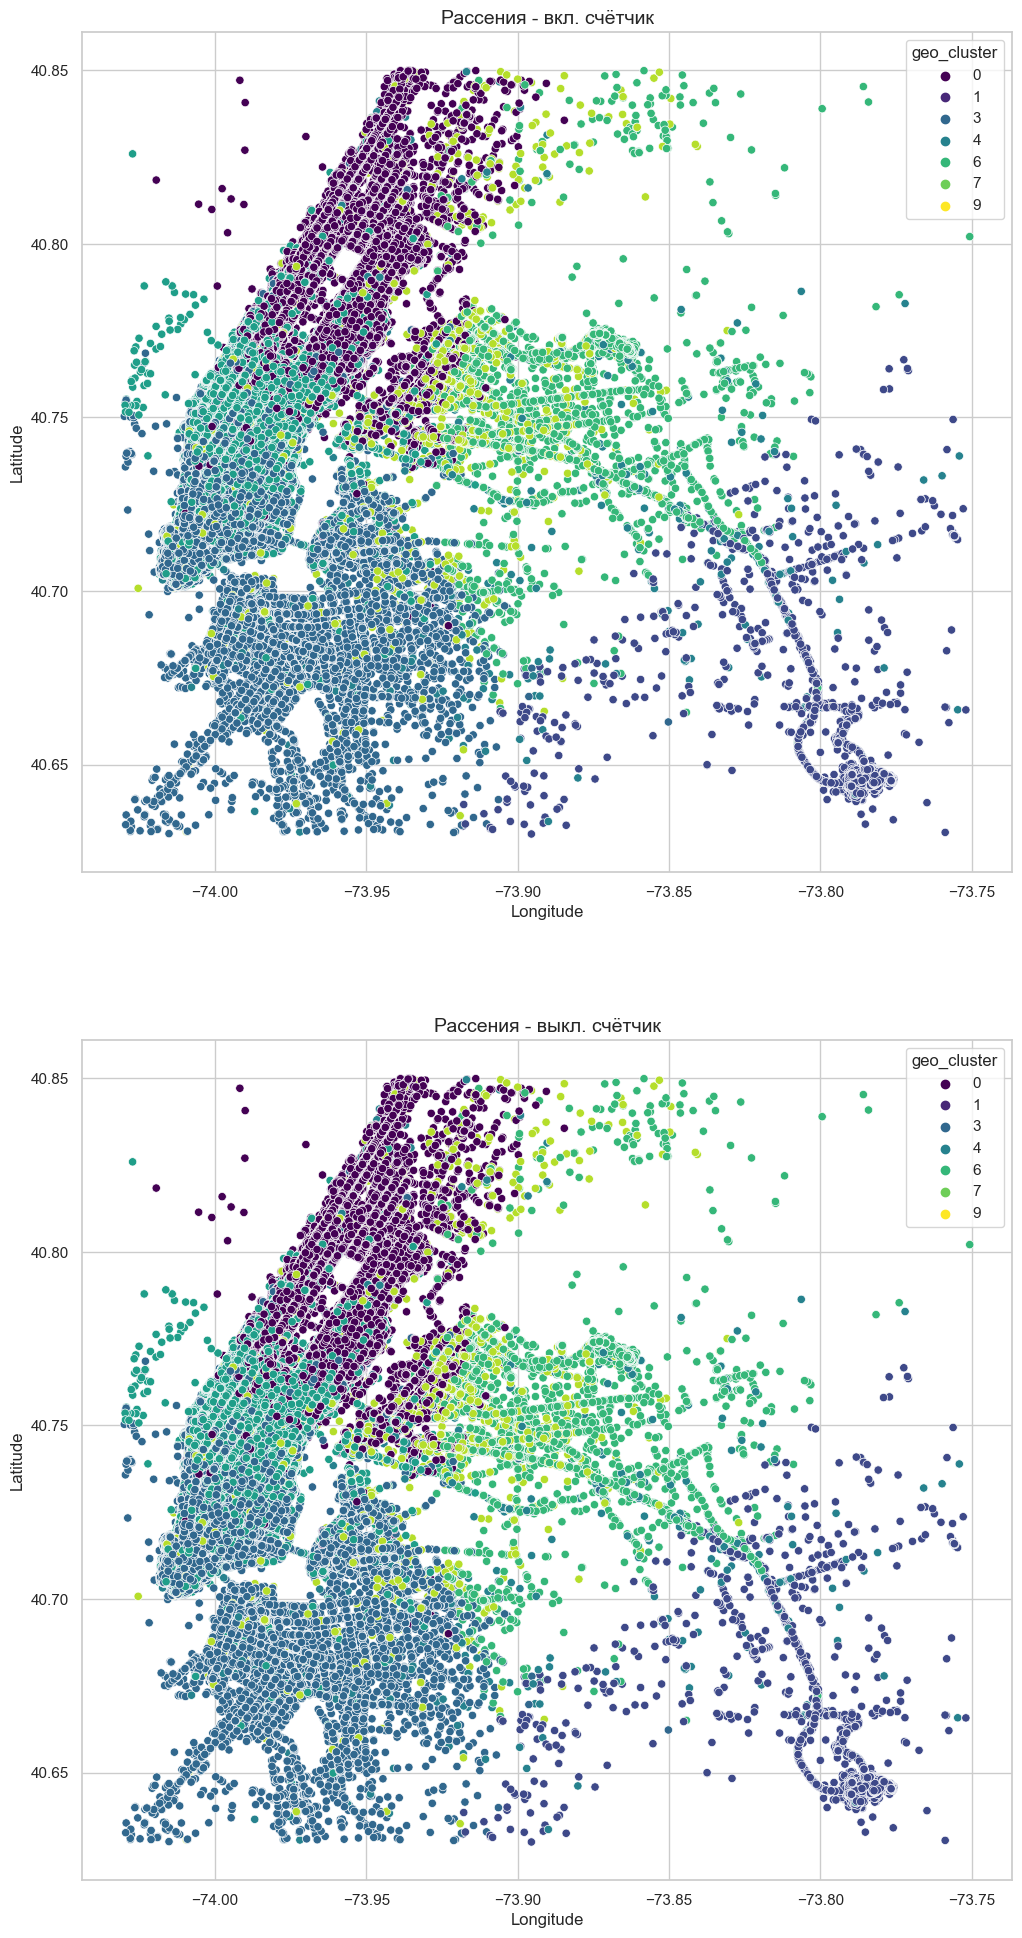

In [53]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 24))

flag = (taxi_data['pickup_longitude'] >= city_long_border[0]) & \
        (taxi_data['pickup_longitude'] <= city_long_border[1]) & \
        (taxi_data['pickup_latitude'] >= city_lat_border[0]) & \
        (taxi_data['pickup_latitude'] <= city_lat_border[1])
flag1= (taxi_data['dropoff_longitude'] >= city_long_border[0]) & \
        (taxi_data['dropoff_longitude'] <= city_long_border[1]) & \
        (taxi_data['dropoff_latitude'] >= city_lat_border[0]) & \
        (taxi_data['dropoff_latitude'] <= city_lat_border[1])

sns.scatterplot(x='pickup_longitude', 
                y='pickup_latitude', 
                hue='geo_cluster', 
                data = taxi_data[flag], 
                palette='viridis',
               ax=axes[0])

sns.scatterplot(x='pickup_longitude', 
                y='pickup_latitude', 
                hue='geo_cluster', 
                data = taxi_data[flag], 
                palette='viridis',
               ax=axes[1])

axes[0].set_xlabel('Longitude', fontsize=12)
axes[0].set_ylabel('Latitude', fontsize=12)
axes[0].set_title('Рассения - вкл. счётчик', fontsize=14)
axes[0].legend(title='geo_cluster', bbox_to_anchor=(1, 1))

axes[1].set_xlabel('Longitude', fontsize=12)
axes[1].set_ylabel('Latitude', fontsize=12)
axes[1].set_title('Рассения - выкл. счётчик', fontsize=14)
axes[1].legend(title='geo_cluster', bbox_to_anchor=(1, 1))

plt.show()

[План](#plan)

### 3_дополнительно<a id="3_д"></a>

Рассмотрим некоторые признаки.

3_д_1 - влияние праздничного дня на длительность поездки

Праздничные дни + длительность поездки

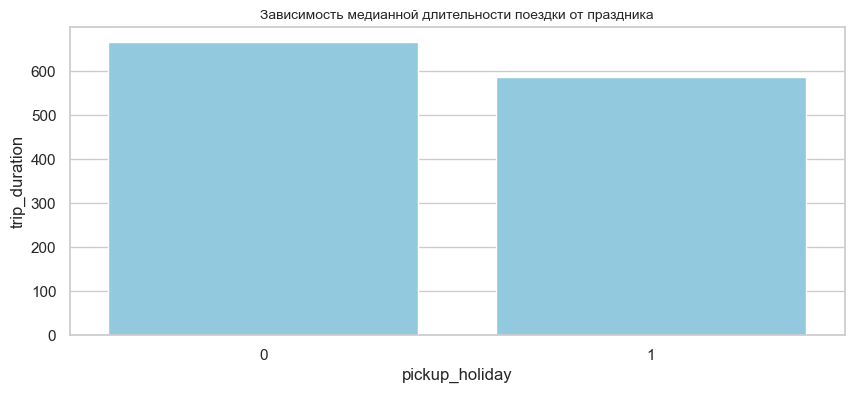

In [54]:
sns.set(style='whitegrid')
median_trip_duration_by_hour = taxi_data.groupby("pickup_holiday")['trip_duration'].median().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

sns.barplot(
    data=median_trip_duration_by_hour,
    x='pickup_holiday', 
    y='trip_duration',
    color='skyblue',
    ax=axes
)
axes.set_title('Зависимость медианной длительности поездки от праздника', fontsize=10)
plt.show()

В праздники пробок меньше - поездки короче. Только как-то не особо короче, по ощущениям должно быть сильно короче.

Направление движения

In [55]:
taxi_data['direction'].describe()

count    1.458233e+06
mean     3.439292e+00
std      4.064528e+00
min      0.000000e+00
25%      1.232410e+00
50%      2.094297e+00
75%      3.876099e+00
max      5.748754e+02
Name: direction, dtype: float64

Направление движения само по себе смысла не имеет. Имеет смысл сочетание факторов:
- район отправления
- район назначения
- время.

Исхожу из того, что в моём городе можно выделить очень чётко:
- утренний поток - с окраин в центр (я езжу на работу против потока и вижу эту пробку - в обратном направлении мне бы пришлось ехать в разы дольше);
- вечерний поток в обратном направлении (я опять еду против потока и опять вижу пробки уже в обратном направлении, аналогично).

Но выявление этой гипотезы требует более глубокого анализа (в частности, можно было бы собрать две группы кластеров: кластеры отправления - 1-я группа, коластеры назначения - 2-я группа и посчитать среднюю скорость перемещения в зависимости от времени суток). Но это выходит за рамки данной пошаговой.

кластер по началу - завершению + время суток длит поездки

In [56]:
# ограничим по скорости, т.к. из-зы выбросов (которые по методике мы оставили) ничего не видно на графике
flag = taxi_data['avg_speed'] < 100
pivot = taxi_data[flag].pivot_table(
    values='avg_speed',
    index=['pickup_hour'],
    columns='geo_cluster',
    aggfunc=['median'],
    fill_value=0
).reset_index()
pivot

pickup_hour     median                                      \
geo_cluster                      0  1          2          3          4   
0                     0  26.241369  0  52.703965  18.365228  40.164127   
1                     1  28.336060  0  54.024580  19.171563  40.776747   
2                     2  30.180722  0  50.869241  19.999853  40.556313   
3                     3  31.309512  0  53.110371  21.148085  46.095224   
4                     4  31.795336  0  49.063263  23.958333  56.512382   
5                     5  30.032727  0  44.624969  27.100892  55.061506   
6                     6  25.153846  0  32.102140  25.356735  47.821139   
7                     7  18.387508  0  24.247401  20.602369  42.213113   
8                     8  15.078802  0  27.282747  16.639666  38.671213   
9                     9  16.025789  0  34.236165  15.344910  42.422659   
10                   10  15.895261  0  34.674119  15.607046  41.915028   
11                   11  15.430615  0  34.053747  14.841018  42.266791   
12                   12  15.245909  0  35.136658  14.509091  39.449704   
13                   13  15.721644  0  32.830016  14.737370  35.700704   
14                   14  14.903027  0  31.227356  14.613777  29.868103   
15                   15  14.474304  0  29.452232  14.563795  26.037511   
16                   16  15.787208  0  28.701747  14.910049  24.868276   
17                   17  16.314517  0  29.969690  14.853416  25.916484   
18                   18  16.704770  0  31.988504  14.574592  30.443652   
19                   19  18.321365  0  37.336587  14.981258  34.384464   
20                   20  20.808799  0  41.069320  15.925046  39.442920   
21                   21  21.726473  0  43.206041  17.281382  41.248872   
22                   22  22.057394  0  44.220582  18.214354  39.701318   
23                   23  23.899578  0  48.266717  18.263624  38.856131   

                                                    
geo_cluster          5          6  7          8  9  
0            20.241600  39.674345  0  25.341394  0  
1            22.215036  33.315181  0  27.504312  0  
2            23.311060  23.290714  0  29.477701  0  
3            24.356933  22.670000  0  31.451907  0  
4            25.490923  22.812431  0  35.217118  0  
5            26.561096  25.968600  0  39.555646  0  
6            23.213652  24.998230  0  38.202805  0  
7            17.845942  21.868364  0  32.493179  0  
8            13.626672  19.628382  0  30.745967  0  
9            12.315942  21.588304  0  30.892376  0  
10           12.381538  24.401195  0  29.934174  0  
11           12.321185  24.398455  0  29.794080  0  
12           12.127610  25.594915  0  29.432939  0  
13           12.200213  26.148509  0  27.735414  0  
14           12.363123  24.642371  0  24.813575  0  
15           12.770620  24.016759  0  22.499697  0  
16           13.418841  23.440324  0  21.245320  0  
17           13.120123  23.924156  0  21.318220  0  
18           13.294661  27.029904  0  23.542131  0  
19           14.687073  32.254680  0  26.052523  0  
20           16.499891  36.860216  0  26.165292  0  
21           17.264525  37.553488  0  26.455839  0  
22           17.377224  37.440422  0  25.015062  0  
23           18.523125  39.315880  0  24.738520  0

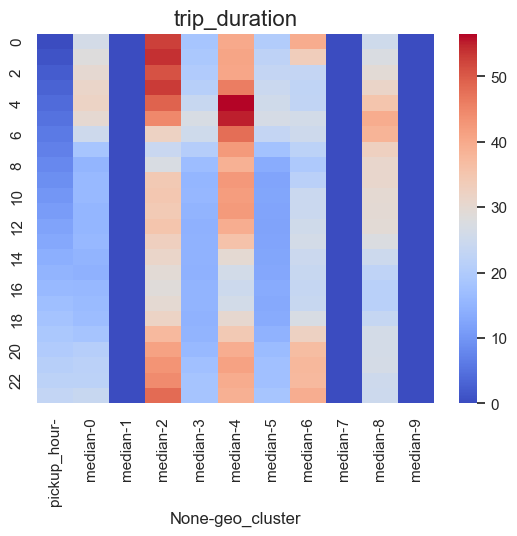

In [57]:
heatmap = sns.heatmap(data=pivot, cmap='coolwarm')
heatmap.set_title('trip_duration', fontsize=16);

Собствено здесь по каждому кластеру можно видеть снижение скорости в определённое время суток (пробки)

видимость - длит поездки

In [58]:
pivot = taxi_data.pivot_table(
    values='avg_speed',
    index=['visibility'],
    columns='geo_cluster',
    aggfunc=['median'],
    fill_value=0
).reset_index()

#taxi_data.groupby(by = 'visibility')['vg_speed'].mean()

pivot

visibility     median                                      \
geo_cluster                     0  1          2          3          4   
0                  0.4  14.112508  0  20.992180  13.768417  47.943407   
1                  0.8  16.673808  0  30.571493  15.566038  31.605001   
2                  1.2  15.058069  0  35.954518  14.913218  37.198171   
3                  1.6  18.381871  0  33.084424  17.011059  33.501970   
4                  2.0  15.921933  0  31.428975  15.127759  34.575849   
5                  2.4  15.075039  0  37.250379  16.630288  33.081276   
6                  2.8  16.108602  0  35.853315  15.134625  45.043878   
7                  3.2  17.316800  0  33.024416  16.980438  41.211882   
8                  4.0  17.485754  0  32.516220  17.277330  39.077504   
9                  4.8  16.599943  0  33.186616  16.260946  34.174451   
10                 6.4  16.723061  0  33.588530  16.591866  37.303099   
11                 8.0  17.011123  0  34.601189  16.708320  38.321441   
12                 9.7  16.288705  0  34.635323  15.718442  33.570872   
13                11.3  17.742040  0  35.327957  16.611186  35.727069   
14                12.9  16.720134  0  32.100785  16.029207  32.564882   
15                14.5  17.401337  0  33.181624  16.433921  36.153377   
16                16.1  18.143314  0  36.565671  16.645574  36.896194   

                                                             
geo_cluster          5          6  7          8           9  
0            13.513194  17.387485  0  22.131719    0.000000  
1            15.603415  28.626164  0  26.090002    0.000000  
2            12.724163  27.798298  0  30.629146    0.000000  
3            15.097512  30.762484  0  31.878191    0.000000  
4            14.972467  21.461469  0  23.294785  242.167269  
5            13.542220  29.714848  0  24.869357    0.000000  
6            12.824359  25.965200  0  31.438950    0.000000  
7            15.475649  26.570239  0  29.086508    0.000000  
8            15.415228  24.424126  0  29.762406    0.000000  
9            14.189199  25.425347  0  27.155427    0.000000  
10           14.598505  26.455601  0  29.065955  119.180607  
11           14.748625  24.964672  0  29.352032    0.000000  
12           13.611674  24.800843  0  26.791129    0.000000  
13           14.865442  26.600229  0  27.770717    0.000000  
14           14.136052  24.851163  0  26.147316    0.000000  
15           14.348118  26.736538  0  28.138667    0.000000  
16           15.455099  28.147323  0  28.179308    0.000000

Видимость ниже 0,4 для большинства кластеров приводит к снижению скорости.

кол-во осадков - скорость

In [59]:

for i in range(24):
    flag = taxi_data['pickup_hour'] == i
    print('pickup_hour =', i)
    pivot = taxi_data[flag].pivot_table(
        values='avg_speed',
        index=['precip'],
        columns='geo_cluster',
        aggfunc=['median'],
        fill_value=0
    ).reset_index()
    display(pivot)

pickup_hour = 0


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  26.229982  52.768350  18.320721  40.164127  20.240717   
1              0.3  28.128936  51.491852  20.877477  41.668047  21.007595   
2              0.5  25.165331  55.112642  19.048467  29.944098  19.660845   
3              1.5  25.045707  43.005185  19.262929  46.601559  19.774056   
4              2.0  23.388913  40.313003  21.566848  40.024420  25.054412   
5              3.6  27.696624  55.130641  21.770311  46.957399  22.875603   

                                   
geo_cluster          6          8  
0            39.475734  25.265743  
1            42.356851  26.968729  
2            39.643599  25.464873  
3            22.991629  23.480175  
4            47.264727  27.888890  
5            43.563389  26.788024

pickup_hour = 1


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  28.446741  54.070149  19.197559  40.140351  22.240519   
1              0.3  23.626852  47.038634  16.591287  43.908023  20.026020   
2              1.0  27.752717  54.729730  24.800798  42.701936  24.410700   
3              1.8  29.139191  60.483892  21.899439   0.000000  26.512015   
4              2.0  27.763117  38.776515  24.785816   0.000000  26.929502   
5              2.3  29.494545  56.227047  22.416000  53.088455  25.506900   

                                   
geo_cluster          6          8  
0            32.369409  27.610313  
1            27.017471  21.811240  
2            29.915852  27.563706  
3            42.312987  26.982080  
4            21.501318  30.521497  
5            46.942046  27.956364

pickup_hour = 2


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  30.180722  50.906781  19.994516  40.379631  23.335493   
1              0.3  30.852455  58.137349  22.023281  44.699463  23.553599   
2              0.5  32.560809  38.884307  24.774293   0.000000  25.499171   
3              0.8  26.478947  45.872340  17.440026  25.167640  18.726869   
4              1.0  27.270729  27.223873  25.602590   0.000000  24.947891   
5              5.1  31.586428  31.549397  22.991561   0.000000  25.659474   

                                   
geo_cluster          6          8  
0            22.335211  29.378824  
1            47.137014  37.091382  
2            33.626471  34.696000  
3            17.730989  28.906597  
4             0.000000  36.883654  
5             0.000000  32.167255

pickup_hour = 3


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  31.496224  51.718049  21.287761  45.703199  24.401721   
1              0.3  31.758396  54.436433  25.683099  50.530469  26.279149   
2              0.5  28.381309   1.379429  18.958255  50.280804  25.023685   
3              0.8  30.736699   0.000000  25.692714  23.056898  24.893958   
4              1.3  29.610780   0.000000  18.515952  49.955087  22.727863   
5              1.5  24.277101   0.000000  17.557223   0.000000  21.649387   
6              2.3  27.401905   0.000000  19.315841  25.875664  23.497459   
7              4.1  33.023607   0.000000  19.931779  69.227874  25.815904   

                                   
geo_cluster          6          8  
0            22.005957  31.603538  
1            45.543913  34.101384  
2            21.933584  30.728792  
3            24.392368  38.043336  
4            33.218739  24.536858  
5            16.447763  20.220408  
6            38.786615  27.308224  
7             0.000000  37.377531

pickup_hour = 4


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  31.921858  49.063263  24.034564  56.617165  25.601996   
1              0.3  32.681131  73.861500  21.026828  51.802934  22.698204   
2              0.5  31.714554   0.000000  23.446611  56.542157  24.700862   
3              0.8  39.669569   0.000000  26.339439  60.391245  29.318343   
4              1.0  15.975150   0.000000  16.768923  20.003338  17.485033   
5              3.0  27.792803   0.000000  21.774473  45.805388  24.745708   
6             10.2  28.855385  48.057941  24.400595  53.374164  22.733958   

                                   
geo_cluster          6          8  
0            22.800214  35.292669  
1            22.024478  35.278814  
2            22.812431  35.024944  
3            32.537427  41.941956  
4             0.000000  17.571706  
5             0.000000  30.079125  
6            24.935238  28.132861

pickup_hour = 5


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  30.126065  44.475377  27.165356  55.198219  26.651797   
1              0.3  29.175172  48.975870  31.161153  54.990337  28.531060   
2              0.5  29.477167  47.864310  26.713208  54.097015  24.478850   
3              0.8  27.036438  46.978819  32.906441  52.234713  27.577289   
4              1.3  29.187429  59.525803  26.935834  51.749165  20.752583   
5              1.5  28.991295  42.785025  20.941600  54.402591  27.855489   
6              1.8  26.909830  35.305624  23.294006  46.271941  25.174191   
7              2.0  24.471821  35.477926  25.676341  49.960524  26.875176   

                                      
geo_cluster          6          8  9  
0            26.014178  39.670691  0  
1            31.993405  45.458046  0  
2            20.732617  37.350533  0  
3             0.000000  40.019574  0  
4            16.078706  34.284352  0  
5            22.035029  36.718563  0  
6             0.000000  46.457450  0  
7            28.976173  34.866232  0

pickup_hour = 6


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  25.275600  32.321250  25.541589  48.281976  23.304873   
1              0.3  23.572424  25.397540  22.676597  39.416135  21.626449   
2              0.5  23.611525  30.577507  23.965944  45.090183  22.978868   
3              1.0  33.365204  50.279832  25.492791  52.288602  28.136577   
4              1.8  25.157399  22.527699  26.435257  34.974752  22.563063   
5              2.0  20.776425  24.015881  22.300806  34.575849  22.059471   
6              2.5  22.970656  30.561818  25.915663  49.671671  21.012007   
7              3.3  21.558866  24.238987  21.845951  40.652007  22.115149   
8              5.1  27.821455  46.275196  25.902057  35.225172  27.577777   
9              5.3  29.546402  50.177837  22.123746  53.786011  28.076180   

                                   
geo_cluster          6          8  
0            25.031771  38.359297  
1            27.835379  37.924024  
2            24.187006  35.905476  
3            24.162948  36.219921  
4            20.227470  25.576647  
5            27.027248  31.625451  
6            28.721525  37.949909  
7            17.969345  36.493320  
8            39.256899  33.413865  
9            29.047957  41.085913

pickup_hour = 7


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  18.456503  24.667886  20.641204  42.973533  17.840471   
1              0.3  18.472962  21.131479  20.852993  37.415310  18.231511   
2              0.5  18.613086  19.565667  21.392308  42.840106  18.222704   
3              0.8  16.186887  17.034104  18.647477  36.352563  16.649520   
4              1.0  15.880402  18.693253  18.936576  34.069617  16.963259   
5              1.3  27.016901  52.065197  26.464865  57.991407  27.235041   
6              2.8  17.045784  22.855159  19.438691  56.164500  16.346445   
7              3.0  15.893369  19.664381  17.418443  31.291258  18.112264   
8              8.1  25.634510  33.145642  28.717088  41.059565  23.778344   

                                   
geo_cluster          6          8  
0            22.069258  32.525986  
1            21.091304  30.644465  
2            18.526664  32.813857  
3            21.124848  30.186328  
4            22.075570  22.583227  
5            37.738588  43.958399  
6            19.193954  35.940282  
7            13.633875  30.299801  
8             0.000000  32.167492

pickup_hour = 8


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  15.121298  27.708531  16.717296  38.897574  13.670376   
1              0.3  15.235550  22.446624  16.536110  34.921103  13.537390   
2              0.5  14.118530  24.286343  16.324941  32.619858  13.416774   
3              1.0  13.571854  20.871901  14.465541  22.445370  11.913123   
4              2.0  12.811689  21.535447  16.143730  26.988809  11.938358   
5              2.3  14.681150  23.652821  14.329273  32.820259  12.684485   
6              2.8  13.690420  25.734009  16.141474  31.064124  13.160045   
7              3.8  13.885471   0.000000  17.188816   0.000000  13.435826   
8              5.1  25.005827  46.689321  21.379215  53.731330  21.704478   

                                   
geo_cluster          6          8  
0            19.815844  30.985997  
1            18.325867  26.893705  
2            16.149068  28.394545  
3            16.391480  24.282464  
4            14.989756  18.592315  
5            15.178925  25.601673  
6            18.633107  39.160614  
7             0.000000   0.000000  
8            38.861186  35.255621

pickup_hour = 9


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  16.139796  34.819115  15.425870  42.820189  12.356830   
1              0.3  13.359954  30.737085  13.427388  37.039848  10.481605   
2              0.5  15.485341  40.581736  15.588934  54.732376  13.145454   
3              0.8  13.120728  21.848267  12.873327  29.297795  10.170000   
4              1.3  15.638843  25.225992  14.837605  33.100194  12.611149   
5              2.3  15.205395  27.084440  14.410371  33.268030  11.917672   
6              2.8  23.130026  54.788922  24.685273  53.005856  20.707658   
7              3.6  16.047680  25.848697  14.180512   0.000000  14.766841   
8             11.9  23.841711  47.312758  23.670334  53.245485  24.026087   

                                   
geo_cluster          6          8  
0            21.935277  31.054513  
1            18.410742  27.830545  
2            26.344634  32.661075  
3            18.787116  18.026822  
4            17.871520  17.454515  
5            17.384749  27.866242  
6            45.011262  45.390025  
7            32.041442  15.054459  
8            21.400078  29.539150

pickup_hour = 10


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  15.917277  35.252848  15.693170  41.903304  12.416665   
1              0.3  17.366879  35.544281  15.980963  40.878294  13.157291   
2              0.5  15.122057  29.924619  13.342481  41.406208  11.393814   
3              0.8  14.749554  27.996887  14.279772  37.620040  11.549765   
4              1.0  14.101424  31.171302  14.683632  46.700532  11.068571   
5              2.3  12.079952  31.000954  11.546667  45.470885   9.309739   
6              3.0  12.883279  25.564351  13.642883  43.858068   9.775958   
7              4.3  14.755565   0.000000  14.699670   0.000000  15.003841   
8             11.7  20.816315  52.445446  21.404296  56.901393  21.079223   

                                   
geo_cluster          6          8  
0            24.605214  30.102853  
1            21.068022  28.000755  
2            20.579952  25.784399  
3            19.727738  30.562449  
4            24.514618  28.743284  
5            19.815371  26.847209  
6            19.519958  27.615734  
7            17.387485  13.824711  
8            37.569057  34.667046

pickup_hour = 11


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  15.501812  34.567210  14.905636  42.582404  12.409303   
1              0.3  14.025174  34.896677  14.480748  40.611249  11.434492   
2              0.5  12.513886  24.303690  12.602991  34.867019   9.496425   
3              1.3  18.218028  30.004380  17.109917  41.946725  19.914310   
4              1.5  14.551304  31.318428  13.060565  44.410281   9.755087   
5              1.8  20.147456  23.068057  13.400748  44.918704  15.855328   
6              2.0  14.869240  27.711779  15.165361  42.487252  11.532248   
7              4.8  13.573679   0.000000  17.357538   0.000000  14.059516   

                                   
geo_cluster          6          8  
0            24.417087  29.972539  
1            25.581341  30.629146  
2            20.920608  26.578602  
3            28.580746  37.815001  
4            22.972866  26.753391  
5            23.893584  21.545311  
6            25.866991  30.366111  
7             0.000000   0.000000

pickup_hour = 12


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  15.270393  35.414595  14.555008  39.449704  12.173674   
1              0.3  15.356644  32.575671  14.842721  42.489820  12.348118   
2              0.5  12.045771  32.261437  11.973389  43.319562   9.161307   
3              0.8  18.595427  26.135253  17.254412  37.913788  17.884938   
4              1.3  18.730065  28.405611  13.673699  48.158386  15.553966   
5              1.8  15.008362  39.512565  13.960517  44.855804  11.304139   
6              2.5  12.437402   0.000000  13.144387   0.000000  13.536702   
7              3.0  11.978473  35.494630  12.400171  26.375570  10.186875   

                                      
geo_cluster          6          8  9  
0            25.627150  29.622759  0  
1            29.863966  27.603831  0  
2            20.449190  28.560711  0  
3            21.681461  29.781492  0  
4            21.156311  23.703078  0  
5            26.609689  31.012210  0  
6             0.000000   0.000000  0  
7            17.402310  29.297574  0

pickup_hour = 13


precip     median                                                 \
geo_cluster                 0  1          2          3          4          5   
0              0.0  15.678116  0  33.120572  14.688513  35.701053  12.153642   
1              0.3  16.728345  0  30.392382  14.193913  33.761839  12.910632   
2              0.5  16.688482  0  31.432670  17.319615  40.006267  14.234093   
3              0.8  14.649788  0  25.949282  14.785737  33.757826  12.673113   
4              1.3  16.394171  0  33.643235  18.018123  35.679702  13.696596   
5              4.1  15.238285  0   0.000000  12.207812   0.000000  12.894321   
6              8.1  14.690683  0  31.826749  15.799042  52.133535  11.022799   

                                               
geo_cluster          6          8           9  
0            26.024645  27.632825  125.929431  
1            24.085398  28.862666    0.000000  
2            30.497354  33.168048    0.000000  
3            29.429339  30.340369    0.000000  
4            28.996374  38.361102    0.000000  
5             0.000000  12.761935    0.000000  
6            27.403644  26.420845    0.000000

pickup_hour = 14


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  14.907845  31.214489  14.634228  29.920693  12.418167   
1              0.3  13.993564  31.588533  13.361538  25.592590  10.265000   
2              0.5  13.466520  25.791859  12.868455  26.154255   9.667607   
3              0.8  17.327213  35.249550  16.196032  36.373176  14.934066   
4              4.8  15.778952  12.993502  19.833122   0.000000  13.576138   
5              6.6  14.041043  30.891075  13.492225  20.845149   9.830205   

                                      
geo_cluster          6  7          8  
0            24.612284  0  24.818651  
1            22.728685  0  22.906631  
2            26.156362  0  23.861282  
3            31.182634  0  28.326786  
4             0.000000  0   9.733550  
5            24.456445  0  17.408971

pickup_hour = 15


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  14.574757  29.620405  14.644886  26.287311  12.880433   
1              0.3  12.318435  24.746899  11.830479  18.443432  10.561752   
2              0.5  11.150137  24.222771  13.267471  18.384591   8.732126   
3              1.0  15.383774  26.694144  12.997590  19.819099  12.198702   
4              2.0  12.585988  33.522733  13.720242  22.882886  10.731666   
5              2.3  12.846523  28.334530  14.173856  21.278108   9.957280   
6              3.3  13.135989  25.198982  13.657617  28.482975  10.753043   
7              3.8  12.447881  21.623843  14.372226  25.524885  11.998961   
8              4.6  16.150324  40.284332  14.269628  26.633392  11.677072   

                                      
geo_cluster          6          8  9  
0            24.092272  22.733081  0  
1            20.352525  20.678456  0  
2            21.485982  17.088040  0  
3            24.648387  22.680505  0  
4            22.506170  19.103607  0  
5            19.461406  22.262754  0  
6            27.925976  16.915822  0  
7            23.540040  22.295679  0  
8            24.500040  16.776472  0

pickup_hour = 16


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  15.857132  28.726126  14.932040  25.178485  13.516845   
1              0.3  14.421985  30.880833  15.961689  20.230677  12.903628   
2              0.5  15.851440  27.074649  14.191213  22.703875  11.417822   
3              2.8  13.513745  25.261710  12.807250  19.664679  11.497181   
4              3.0  14.792369  28.143591  13.942017  16.908916  10.039206   
5              3.8  12.015897   0.000000   0.000000   0.000000  17.524010   

                                                  
geo_cluster          6  7          8           9  
0            23.540336  0  21.340570    0.000000  
1            23.117796  0  18.973090    0.000000  
2            22.007697  0  18.441068  242.167269  
3            22.290116  0  14.542047    0.000000  
4            18.459185  0  20.434879    0.000000  
5             0.000000  0   0.000000    0.000000

pickup_hour = 17


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  16.356054  30.068763  14.897869  26.041419  13.153106   
1              0.3  16.567978  34.027023  15.115308  27.963984  13.895030   
2              0.5  15.027337  24.581246  11.668707  20.087320  10.359474   
3              0.8  15.687285  29.459829  14.105127  27.545578  13.900920   
4              1.5  15.619930  31.950108  15.084947  21.999868  12.079980   
5              3.8   9.999270   0.000000  17.373377   0.000000   0.000000   
6              5.1  15.000172  24.294154  14.206519  21.786785  10.658389   

                                      
geo_cluster          6          8  9  
0            23.958486  21.375151  0  
1            27.154930  22.234437  0  
2            17.665556  19.924268  0  
3            24.261379  23.239289  0  
4            24.087041  18.593836  0  
5            17.801125   0.000000  0  
6            18.772342  17.484250  0

pickup_hour = 18


precip     median                                                 \
geo_cluster                 0  1          2          3          4          5   
0              0.0  16.718425  0  31.946327  14.566664  30.430098  13.287343   
1              0.3  16.124211  0  32.069013  14.449873  30.035047  12.619705   
2              0.5  19.197000  0  33.622637  15.625125  41.141230  15.822654   
3              0.8  15.498200  0  42.648199  13.986438  56.419780  11.735905   
4              1.5  16.439874  0  32.165688  14.531478  31.965703  14.302470   

                                               
geo_cluster          6          8           9  
0            26.767126  23.643336  124.485145  
1            28.097917  22.473821    0.000000  
2            36.761933  21.679504    0.000000  
3            31.160375  22.513641    0.000000  
4            24.352426  21.805607    0.000000

pickup_hour = 19


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  18.337331  37.214751  14.948493  34.464160  14.671765   
1              0.3  18.551566  43.847543  14.735662  33.552060  14.330127   
2              0.5  17.780718  36.293449  15.097647  32.400000  14.986740   
3              1.3  18.786667  40.704662  16.003497  33.543262  15.777406   
4              2.0  18.280133  40.988669  17.572349  33.557856  16.232079   
5              2.5  16.137193  41.018354  15.058713  33.045147  13.512253   

                                   
geo_cluster          6          8  
0            32.146649  26.019653  
1            37.885280  35.127948  
2            35.219213  31.161237  
3            37.424214  31.282551  
4            39.154368  24.793948  
5            27.270872  20.335610

pickup_hour = 20


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  20.848055  40.966929  15.848072  39.434100  16.488095   
1              0.3  20.198431  44.341966  17.361503  37.492344  17.044364   
2              0.5  19.485552  38.489915  15.766987  36.729185  15.811828   
3              1.3  22.410748  44.762778  18.066583  47.000649  17.352306   
4              1.8   0.000000   0.000000   0.000000   0.000000   0.000000   

                                      
geo_cluster          6  7          8  
0            36.914988  0  26.170924  
1            36.409113  0  24.907333  
2            36.168677  0  30.066353  
3            33.944513  0  25.655285  
4             0.000000  0   0.000000

pickup_hour = 21


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  21.748936  43.262582  17.307359  41.500860  17.299736   
1              0.3  21.528134  47.053636  17.101888  40.120263  16.818971   
2              1.0  22.795689  34.154931  11.726385  42.038865  15.773906   
3              1.8  21.312940  45.833594  18.957588  28.249434  17.121254   
4              2.8  21.688122  35.696337  20.221795  59.937295  19.538504   
5              4.1  20.552410  37.080824  14.137972  38.431784  15.462032   

                                               
geo_cluster          6          8           9  
0            37.559561  26.464283  266.341935  
1            38.712201  27.089362    0.000000  
2            41.481466  19.745631    0.000000  
3            34.513699  26.109032  167.537082  
4            38.768896  21.696000    0.000000  
5            31.091836  25.209391    0.000000

pickup_hour = 22


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  22.060603  44.150405  18.199059  39.611245  17.348312   
1              0.3  22.032863  40.353092  17.174717  42.594661  16.272082   
2              0.5  24.358345  57.111051  22.014686  67.206640  21.961208   
3              0.8  22.735766  49.416969  20.598692  42.961839  19.494829   
4              1.0  21.679286  43.648067  20.201053  25.875957  18.033348   
5              2.0  20.393710  59.103952  21.841886  26.256656  17.821746   
6              6.1  20.768496  31.962936  15.118367  32.780898  16.307498   

                                      
geo_cluster          6          8  9  
0            37.373008  25.124046  0  
1            36.454017  21.638265  0  
2            40.991786  24.671578  0  
3            38.312141  25.307147  0  
4            29.403009  30.208491  0  
5            41.773823  20.756150  0  
6            37.579500  20.250806  0

pickup_hour = 23


precip     median                                              \
geo_cluster                 0          2          3          4          5   
0              0.0  23.873887  48.203543  18.201031  38.989504  18.478865   
1              0.5  28.030904  39.931391  19.774074   0.000000  22.806516   
2              0.8  26.709041  53.120504  21.558660  31.637502  22.305173   
3              1.0  24.302853  48.048782  20.237024  35.449412  19.108024   
4              1.3  24.693826  49.924469  22.031570  38.964675  19.425381   

                                   
geo_cluster          6          8  
0            39.282698  24.695733  
1            41.149323  31.147604  
2            39.673156  24.435154  
3            41.074898  25.133917  
4            40.411758  27.306287

Вообще сильный дождь приводит к образованию пробок. Здесь мы такого не видим. Это странно.

Расчёт корреляции между значениями (выведем только превышающие 0,8)

In [60]:
# Посчитаем колрреляцию по всем числовым полям.
# Понятно, что так без всякого отбора считать довольно глупо, но проще сначала просто посчитать по всем, а потом уже
# оставить только то, что полезно (что наполнено смыслом)
columns = ['passenger_count', 'pickup_hour', 'total_distance', 'number_of_steps','hour','temperature','visibility','wind speed','precip', 'avg_speed']
for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            crr = taxi_data[col1].corr(taxi_data[col2])
            if crr > 0.7:
                print(col1 , ',', col2, crr)

pickup_hour , hour 1.0
total_distance , number_of_steps 0.795730574927518
number_of_steps , total_distance 0.795730574927518
hour , pickup_hour 1.0


pickup_hour , hour - это как раз безсмысленно, т.к. дно и то же
number_of_steps , total_distance - это логично (чем длинее маршрут, тем больше поворотов на пути)

[План](#plan)

## 4. Отбор и преобразование признаков<a id="4"></a>

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [61]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 30)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip',
       'events', 'avg_speed', 'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [62]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,geo_cluster,date,hour,temperature,visibility,wind speed,precip,events,avg_speed,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,2016-03-14,17.0,4.4,8.0,27.8,0.3,None,15.896176,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,3,2016-06-12,0.0,28.9,16.1,7.4,0.0,None,13.646335,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,3,2016-01-19,11.0,-6.7,16.1,24.1,0.0,None,18.747119,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,3,2016-04-06,19.0,7.2,16.1,25.9,0.0,None,14.932028,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,2016-03-26,13.0,9.4,16.1,9.3,0.0,None,13.364690,6.077642


[План](#plan)

### Задание 4.1<a id="4.1"></a>
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [63]:
# ваш код здесь
# сначлала сделаем таблицу такой же как в методичке:
train_data = train_data.drop(['date', 'hour', 'avg_speed'], axis=1)
# удалим те столбцы, по критериям:
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)
print ('Осталось столбцов в таблице:', len(train_data.columns))

Осталось столбцов в таблице: 25


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [64]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


[План](#plan)

### Задание 4.2<a id="4.2"></a>

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [65]:
# ваш код здесь
# map выгоднее пирименять для одного столбца
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map(lambda x: 0 if x == 'N' else 1)
train_data['vendor_id'] = train_data['vendor_id'].map(lambda x: 0 if x == 1 else 1)

In [66]:
# Ответы на вопросы:
print('среднее по закодированному столбцу vendor_id', round(train_data['vendor_id'].mean(), 2) )
print('среднее по закодированному столбцу store_and_fwd_flag', round(train_data['store_and_fwd_flag'].mean(), 3) )

среднее по закодированному столбцу vendor_id 0.53
среднее по закодированному столбцу store_and_fwd_flag 0.006


[План](#plan)

### Задание 4.3<a id="4.3"></a>
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458642
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458233 non-null  int64  
 1   passenger_count     1458233 non-null  int64  
 2   pickup_longitude    1458233 non-null  float64
 3   pickup_latitude     1458233 non-null  float64
 4   dropoff_longitude   1458233 non-null  float64
 5   dropoff_latitude    1458233 non-null  float64
 6   store_and_fwd_flag  1458233 non-null  int64  
 7   trip_duration       1458233 non-null  int64  
 8   pickup_hour         1458233 non-null  int64  
 9   pickup_day_of_week  1458233 non-null  object 
 10  pickup_holiday      1458233 non-null  int32  
 11  total_distance      1458233 non-null  float64
 12  total_travel_time   1458233 non-null  float64
 13  number_of_steps     1458233 non-null  float64
 14  haversine_distance  1458233 non-null  float64
 15  direction      

In [68]:
# ваш код здесь
train_data = pd.get_dummies(train_data, columns = ['pickup_day_of_week', 'geo_cluster', 'events'], drop_first=True)

Добавим полученную таблицу с закодированными признаками:

In [69]:
#train_data = pd.concat(
#    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
#    axis=1
#)
#print('Shape of data: {}'.format(train_data.shape))

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [70]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [71]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


[План](#plan)

### Задание 4.4<a id="4.4"></a>
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [72]:
# ваш код здесь
selector = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=25)  # Выбираем 25 лучших признаков
X_new = selector.fit_transform(X, y_log)
selected_features = X.columns[selector.get_support()]
selected_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_hour', 'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'direction', 'temperature',
       'pickup_day_of_week_Sunday', 'pickup_day_of_week_Thursday',
       'pickup_day_of_week_Wednesday', 'geo_cluster_2', 'geo_cluster_3',
       'geo_cluster_4', 'geo_cluster_5', 'geo_cluster_6', 'geo_cluster_8',
       'geo_cluster_9', 'events_Rain'],
      dtype='object')

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


Вероятно, признаки: pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, либо geo_cluster излишни.
Кроме того, список отобранных полей несколько отличается от эталонного. Т.к. нам нужно вводить ответы - приведём в соответсвие.

In [73]:
selected_features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'pickup_hour', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'temperature',
       'pickup_day_of_week_Monday', 'pickup_day_of_week_Saturday', 'pickup_day_of_week_Sunday',
       'pickup_day_of_week_Thursday', 'pickup_day_of_week_Tuesday', 'pickup_day_of_week_Wednesday',
       'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_5', 'geo_cluster_7',
       'geo_cluster_9']

In [74]:
X[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458642
Data columns (total 25 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   vendor_id                     1458233 non-null  int64  
 1   passenger_count               1458233 non-null  int64  
 2   pickup_longitude              1458233 non-null  float64
 3   pickup_latitude               1458233 non-null  float64
 4   dropoff_longitude             1458233 non-null  float64
 5   dropoff_latitude              1458233 non-null  float64
 6   store_and_fwd_flag            1458233 non-null  int64  
 7   pickup_hour                   1458233 non-null  int64  
 8   pickup_holiday                1458233 non-null  int32  
 9   total_distance                1458233 non-null  float64
 10  total_travel_time             1458233 non-null  float64
 11  number_of_steps               1458233 non-null  float64
 12  haversine_distance          

In [75]:
#selected_features = selected_features.tolist()
#values_to_remove = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
#selected_features = [feature for feature in selected_features if feature not in values_to_remove]

### Задание 4.5<a id="4.5"></a>
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [76]:
# ваш код здесь
scaler = preprocessing.MinMaxScaler()
X_train_norm = pd.DataFrame(data = scaler.fit_transform(X_train), columns = X_train.columns)
X_valid_norm = pd.DataFrame(data = scaler.transform(X_valid), columns = X_valid.columns)


In [77]:
print('Среднее арифметическое для первого предиктора из валидационной выборки:', round(X_valid_norm['vendor_id'].mean(), 2))

Среднее арифметическое для первого предиктора из валидационной выборки: 0.54


[План](#plan)

## 5. Решение задачи регрессии: линейная регрессия и деревья решений<a id="5"></a>

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



[План](#plan)

### Задание 5.1<a id="5.1"></a>
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [79]:
X_train_norm[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977016 entries, 0 to 977015
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   vendor_id                     977016 non-null  float64
 1   passenger_count               977016 non-null  float64
 2   pickup_longitude              977016 non-null  float64
 3   pickup_latitude               977016 non-null  float64
 4   dropoff_longitude             977016 non-null  float64
 5   dropoff_latitude              977016 non-null  float64
 6   store_and_fwd_flag            977016 non-null  float64
 7   pickup_hour                   977016 non-null  float64
 8   pickup_holiday                977016 non-null  float64
 9   total_distance                977016 non-null  float64
 10  total_travel_time             977016 non-null  float64
 11  number_of_steps               977016 non-null  float64
 12  haversine_distance            977016 non-nul

In [80]:
def rmsle(arr_pred, arr_valid):
    return np.sqrt(np.mean((arr_pred - arr_valid)**2)) 

In [81]:
# ваш код здесь
# обучаем на тех признаках, что выбрали (selected_features)
model = linear_model.LinearRegression ()
model.fit(X_train_norm[selected_features], y_train_log)


LinearRegression()

In [82]:
y_train_log_predict = model.predict(X_train_norm[selected_features])
y_valid_log_predict = model.predict(X_valid_norm[selected_features])
joblib.dump(model, 'model_LinearRegression.pkl')

['model_LinearRegression.pkl']

In [83]:
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 2))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 2))

rmsle train 0.54
rmsle valid 0.54


[План](#plan)

### Задание 5.2<a id="5.2"></a>
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [88]:
# ваш код здесь
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_norm[selected_features])
X_train_poly = poly.transform(X_train_norm[selected_features])
X_valid_poly = poly.transform(X_valid_norm[selected_features])
joblib.dump(model, 'model_PolynomialFeatures.pkl')

['model_PolynomialFeatures.pkl']

In [89]:
model = linear_model.LinearRegression ()
model.fit(X_train_poly, y_train_log)

LinearRegression()

In [90]:
y_train_log_predict = model.predict(X_train_poly)
y_valid_log_predict = model.predict(X_valid_poly)

In [91]:
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 2))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 2))

rmsle train 0.47
rmsle valid 79541994.0


На тренировочный выборке результат значительно лучше - признак переобучения.

[План](#plan)

### Задание 5.3<a id="5.3"></a>
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [93]:
model = make_pipeline(preprocessing.PolynomialFeatures(2), linear_model.Ridge(alpha=1.0))
model.fit(X_train_poly, y_train_log)
joblib.dump(model, 'model_PolynomialFeatures_l2_Tihonov.pkl')

MemoryError: Unable to allocate 450. GiB for an array with shape (977016, 61776) and data type float64

In [ ]:
y_train_log_predict = model.predict(X_train_poly)
y_valid_log_predict = model.predict(X_valid_poly)

In [ ]:
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 2))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 2))

Не хватает памяти

[План](#plan)

### Задание 5.4<a id="5.4"></a>
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [95]:
# ваш код здесь
model = tree.DecisionTreeRegressor(random_state=42)
model.fit(X_train_norm[selected_features], y_train_log)
joblib.dump(model, 'model_DecisionTreeRegressor.pkl')
#model = joblib.load('model_DecisionTreeRegressor.pkl')

In [96]:
y_train_log_predict = model.predict(X_train_norm[selected_features])
y_valid_log_predict = model.predict(X_valid_norm[selected_features])

In [97]:
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 2))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 2))

rmsle train 0.0
rmsle valid 0.57


Переобучение в жёсткой форме. На трейне всё зазубрили, на валиде выдали хуже линейной регрессии.

[План](#plan)

### Задание 5.5<a id="5.5"></a>
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [98]:
# ваш код здесь
for depth in range(7, 20):
    model = tree.DecisionTreeRegressor(random_state=42, max_depth = depth)
    model.fit(X_train_norm[selected_features], y_train_log)
    y_train_log_predict = model.predict(X_train_norm[selected_features])
    y_valid_log_predict = model.predict(X_valid_norm[selected_features])
    print('depth', depth, 'rmsle train', round(rmsle(y_train_log_predict, y_train_log), 2))
    print('depth', depth, '    rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 2))
    

depth 7 rmsle train 0.44
depth 7     rmsle valid 0.45
depth 8 rmsle train 0.44
depth 8     rmsle valid 0.44
depth 9 rmsle train 0.43
depth 9     rmsle valid 0.44
depth 10 rmsle train 0.42
depth 10     rmsle valid 0.43
depth 11 rmsle train 0.41
depth 11     rmsle valid 0.43
depth 12 rmsle train 0.41
depth 12     rmsle valid 0.43
depth 13 rmsle train 0.4
depth 13     rmsle valid 0.43
depth 14 rmsle train 0.38
depth 14     rmsle valid 0.44
depth 15 rmsle train 0.37
depth 15     rmsle valid 0.45
depth 16 rmsle train 0.36
depth 16     rmsle valid 0.45
depth 17 rmsle train 0.34
depth 17     rmsle valid 0.46
depth 18 rmsle train 0.32
depth 18     rmsle valid 0.47
depth 19 rmsle train 0.3
depth 19     rmsle valid 0.48



Оптимальное значение глубины дерева - 13. С 14 наблюдается устойчивый рост RMSE на валидационной выборке.

[План](#plan)

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза<a id="6"></a>

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1<a id="6.1"></a>

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [100]:
# ваш код здесь
model = ensemble.RandomForestRegressor(n_estimators=200,
                                   max_depth=12,
                                   criterion='squared_error', 
                                   min_samples_split=20,
                                   random_state=42)
model.fit(X_train_norm[selected_features], y_train_log)
# сохраним, т.к. обучается долго (повторять после перезагрузки ПК не целесообразно)
joblib.dump(model, 'model_RandomForestRegressor.pkl')
#model = joblib.load('model_RandomForestRegressor.pkl')
y_train_log_predict = model.predict(X_train_norm[selected_features])
y_valid_log_predict = model.predict(X_valid_norm[selected_features])
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 2))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 2))

rmsle train 0.4
rmsle valid 0.41


Результат на уровне дерева решений только обучается многократно дольше

[План](#plan)

### Задание 6.2<a id="6.2"></a>
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [101]:
# ваш код здесь
model = ensemble.GradientBoostingRegressor(learning_rate=0.5,
                                           n_estimators=100,
                                           max_depth=6,
                                           min_samples_split=30,
                                           random_state=42)
model.fit(X_train_norm[selected_features], y_train_log)
# сохраним
joblib.dump(model, 'model_GradientBoostingRegressor.pkl')
#model = joblib.load('model_GradientBoostingRegressor.pkl')

y_train_log_predict = model.predict(X_train_norm[selected_features])
y_valid_log_predict = model.predict(X_valid_norm[selected_features])
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 2))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 2))

rmsle train 0.37
rmsle valid 0.39


Результат ещё чуть лучше. Но тоже очень долго.

### Задание 6.3<a id="6.3"></a>
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


Наилучший результат получен у градиентного бустинга (rmsle train - 0.37 / valid - 0.39). Но это очень ресурсоёмкое решение. Такие же результаты даёт дерево решений (depth = 12 rmsle train 0.041  valid 0.043). Разница несущественная при этом скрость сильно выше.

Тем не менее формально лучший результат у GradientBoostingRegressor - с ней и работаем дальше.

[План](#plan)

### Задание 6.4<a id="6.4"></a>
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


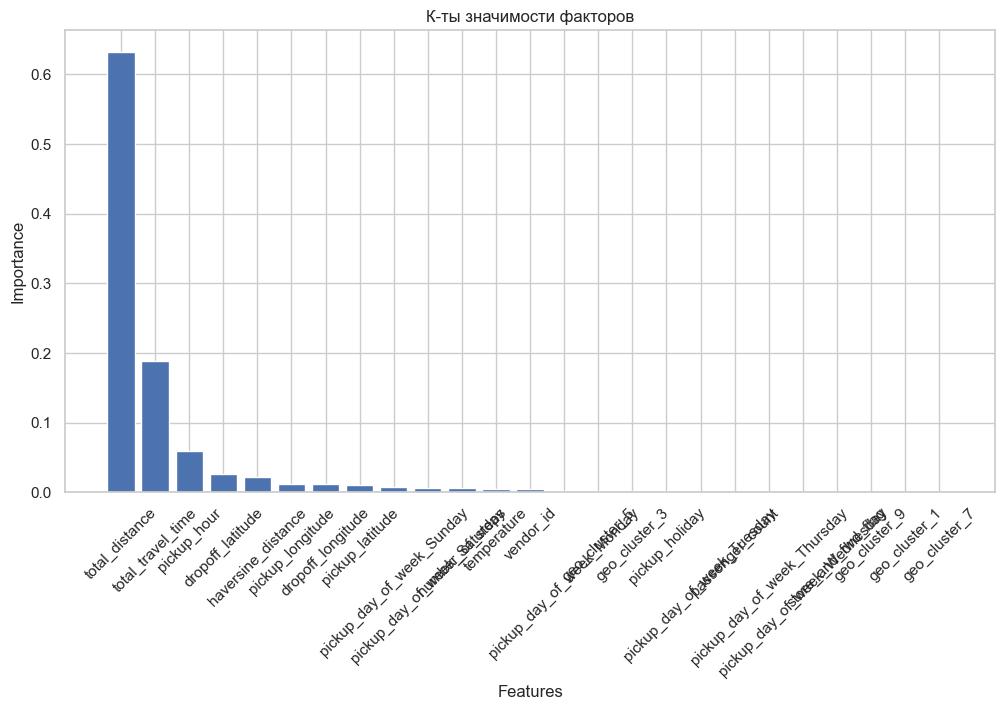

In [102]:
# ваш код здесь
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('К-ты значимости факторов')
plt.xticks(rotation=45)
plt.show()

Данные из OSRM оказывают опредляющее влияние на результат:

- total_distance - т.е. пробки не особо учитываются;

- total_travel_time - наменьшее время поедки (правда из OSRM), фактически это наша целевая пременная но из другого источника. 
Странно, что это не основной фактор фактор !!!
- pickup_hour - тоже логично
Т.е. те наши зависимости, которые мы посторили выше учтены, но как-то совсем слабенько. Интересно будет посмотреть на то, кикие результаты даст та же модель, если мы возьмём только эти два признака.

In [105]:
selected_features_lite = ['total_distance', 'total_travel_time', 'pickup_hour']
model = ensemble.GradientBoostingRegressor(learning_rate=0.5,
                                           n_estimators=100,
                                           max_depth=6,
                                           min_samples_split=30,
                                           random_state=42)
model.fit(X_train_norm[selected_features_lite], y_train_log)
# сохраним
joblib.dump(model, 'model_GradientBoostingRegressor_lite.pkl')
#model = joblib.load('model_GradientBoostingRegressor_lite.pkl')

y_train_log_predict = model.predict(X_train_norm[selected_features_lite])
y_valid_log_predict = model.predict(X_valid_norm[selected_features_lite])
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 3))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 3))

rmsle train 0.442
rmsle valid 0.454


Результат стал хуже - снижение до уровня дерева.

[План](#plan)

### Задание 6.5<a id="6.5"></a>
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [106]:
# ваш код здесь
model = joblib.load('model_GradientBoostingRegressor.pkl')
y_train_log_predict = model.predict(X_train_norm[selected_features])
y_valid_log_predict = model.predict(X_valid_norm[selected_features])
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 3))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 3))


rmsle train 0.372
rmsle valid 0.394


In [107]:
print(np.log(10+1))

2.3978952727983707


In [108]:
np.exp(2.3978952727983707)-1

10.000000000000002

In [117]:
print('mae train', round(metrics.median_absolute_error(np.round(np.exp(y_train_log_predict)-1), np.exp(y_train_log)-1), 1))
print('mae valid', round(metrics.median_absolute_error(np.round(np.exp(y_valid_log_predict)-1), np.exp(y_valid_log)-1), 1))

mae train 109.0
mae valid 110.0


[План](#plan)

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [111]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [118]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)
test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)


test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data = pd.get_dummies(test_data, columns = ['pickup_day_of_week', 'geo_cluster', 'events'])
#Поля в таблице нет, а в модели есть - создаём
test_data['geo_cluster_2'] = 0
test_data['geo_cluster_4'] = 0
test_data['geo_cluster_6'] = 0
test_data['geo_cluster_7'] = 0
test_data['geo_cluster_8'] = 0

X_test = test_data

#print('Shape of data: {}'.format(X_test.shape))

In [120]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625134 entries, 0 to 625133
Data columns (total 47 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   id                            625134 non-null  object        
 1   vendor_id                     625134 non-null  int64         
 2   pickup_datetime               625134 non-null  datetime64[ns]
 3   passenger_count               625134 non-null  int64         
 4   pickup_longitude              625134 non-null  float64       
 5   pickup_latitude               625134 non-null  float64       
 6   dropoff_longitude             625134 non-null  float64       
 7   dropoff_latitude              625134 non-null  float64       
 8   store_and_fwd_flag            625134 non-null  int64         
 9   pickup_date                   625134 non-null  datetime64[ns]
 10  pickup_hour                   625134 non-null  int64         
 11  pickup_holida

In [122]:
X_test = pd.DataFrame(data = scaler.transform(X_test[X_train.columns]), columns = X_train.columns)

In [123]:
model = joblib.load('model_GradientBoostingRegressor.pkl')
y_test_predict = model.predict(X_test[selected_features])
y_test_predict = np.round(np.exp(y_test_predict)-1)

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [124]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

[План](#plan)

### **В качестве бонуса**<a id="бонус"></a>

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

### xgboost

In [ ]:
#!pip install xgboost, catboost

После чего модуль можно импортировать:

In [125]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [126]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_norm[selected_features], label=y_train_log, feature_names=selected_features)
dvalid = xgb.DMatrix(X_valid_norm[selected_features], label=y_valid_log, feature_names=selected_features)
dtest = xgb.DMatrix(X_test[selected_features], feature_names=selected_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [127]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.73993	valid-rmse:0.74193
[10]	train-rmse:0.49091	valid-rmse:0.49348
[20]	train-rmse:0.44092	valid-rmse:0.44378
[30]	train-rmse:0.42592	valid-rmse:0.42896
[40]	train-rmse:0.41796	valid-rmse:0.42114
[50]	train-rmse:0.41269	valid-rmse:0.41618
[60]	train-rmse:0.40851	valid-rmse:0.41222
[70]	train-rmse:0.40599	valid-rmse:0.41003
[80]	train-rmse:0.40339	valid-rmse:0.40780
[90]	train-rmse:0.40085	valid-rmse:0.40551
[100]	train-rmse:0.39936	valid-rmse:0.40423
[110]	train-rmse:0.39780	valid-rmse:0.40295
[120]	train-rmse:0.39648	valid-rmse:0.40186
[130]	train-rmse:0.39536	valid-rmse:0.40105
[140]	train-rmse:0.39445	valid-rmse:0.40039
[150]	train-rmse:0.39325	valid-rmse:0.39949
[160]	train-rmse:0.39226	valid-rmse:0.39880
[170]	train-rmse:0.39168	valid-rmse:0.39846
[180]	train-rmse:0.39081	valid-rmse:0.39789
[190]	train-rmse:0.39013	valid-rmse:0.39750
[200]	train-rmse:0.38934	valid-rmse:0.39703
[210]	train-rmse:0.38882	valid-rmse:0.39672
[220]	train-rmse:0.38799	valid-rmse:0.39617

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [130]:
joblib.dump(model, 'model_xgb.pkl')
#model = joblib.load('model_xgb.pkl')

['model_xgb.pkl']

In [ ]:
#Делаем предсказание на тестовом наборе данных
#y_test_predict = np.exp(model.predict(dtest)) - 1
#print('Modeling RMSLE %.5f' % model.best_score)

In [128]:
y_train_log_predict = model.predict(dtrain)
y_valid_log_predict = model.predict(dvalid)
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 3))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 3))

rmsle train 0.383
rmsle valid 0.394


На уровне бустинга. не лучше. Явное преимущество в том, что быстрее

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
#fig, ax = plt.subplots(figsize = (15,15))
#xgb.plot_importance(model, ax = ax, height=0.5)

### catboost

In [198]:
from catboost import CatBoostRegressor
model = CatBoostRegressor (depth = 5, iterations=300)
model.fit(X_train_norm[selected_features], y_train_log, verbose=10) 

joblib.dump(model, 'model_CatBoost.pkl')


Learning rate set to 0.323359
0:	learn: 0.6535223	total: 102ms	remaining: 30.5s
10:	learn: 0.4452850	total: 976ms	remaining: 25.6s
20:	learn: 0.4275095	total: 1.87s	remaining: 24.9s
30:	learn: 0.4198526	total: 2.73s	remaining: 23.7s
40:	learn: 0.4152963	total: 3.54s	remaining: 22.4s
50:	learn: 0.4118454	total: 4.35s	remaining: 21.3s
60:	learn: 0.4088753	total: 5.16s	remaining: 20.2s
70:	learn: 0.4066262	total: 6s	remaining: 19.3s
80:	learn: 0.4047361	total: 6.81s	remaining: 18.4s
90:	learn: 0.4029768	total: 7.72s	remaining: 17.7s
100:	learn: 0.4017420	total: 8.68s	remaining: 17.1s
110:	learn: 0.4005911	total: 9.66s	remaining: 16.4s
120:	learn: 0.3996194	total: 10.6s	remaining: 15.7s
130:	learn: 0.3985825	total: 11.6s	remaining: 15s
140:	learn: 0.3975717	total: 12.6s	remaining: 14.2s
150:	learn: 0.3967434	total: 13.4s	remaining: 13.3s
160:	learn: 0.3958551	total: 14.2s	remaining: 12.3s
170:	learn: 0.3952298	total: 15s	remaining: 11.3s
180:	learn: 0.3944571	total: 15.8s	remaining: 10.4s


['model_CatBoost.pkl']

In [200]:
y_train_log_predict = model.predict(X_train_norm[selected_features])
y_valid_log_predict = model.predict(X_valid_norm[selected_features])
print('rmsle train', round(rmsle(y_train_log_predict, y_train_log), 3))
print('rmsle valid', round(rmsle(y_valid_log_predict, y_valid_log), 3))

rmsle train 0.388
rmsle valid 0.393


на уровне Catboost, но сильно проще

### нейросеть

In [203]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers

In [204]:
def rmsle_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(tf.math.log(y_pred + 1) - tf.math.log(y_true + 1))))

In [215]:
model = Sequential()
model.add(layers.Dense(25, input_dim=X_train_norm[selected_features].shape[1], activation='elu'))  
model.add(layers.Dense(128))
model.add(layers.Dense(64))
model.add(layers.Dense(1, activation='elu'))
model.compile(optimizer='adam', loss=rmsle_loss)

model.fit(X_train_norm[selected_features].to_numpy(), y_train_log.to_numpy(), 
          epochs=5, 
          batch_size=64, 
          validation_split=0.2,
          validation_data =(X_valid_norm[selected_features].to_numpy(), y_valid_log.to_numpy())  )
model.save('model_ns.h5')

Epoch 1/5
15266/15266 [==============================] - 41s 3ms/step - loss: 0.0735 - val_loss: 0.0679
Epoch 2/5
15266/15266 [==============================] - 39s 3ms/step - loss: 0.0671 - val_loss: 0.0702
Epoch 3/5
15266/15266 [==============================] - 39s 3ms/step - loss: 0.0661 - val_loss: 0.0655
Epoch 4/5
15266/15266 [==============================] - 39s 3ms/step - loss: 0.0652 - val_loss: 0.0651
Epoch 5/5
15266/15266 [==============================] - 39s 3ms/step - loss: 0.0644 - val_loss: 0.0642


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [216]:
y_train_log_predict = model.predict(X_train_norm[selected_features])
y_valid_log_predict = model.predict(X_valid_norm[selected_features])

15039/15039 [==============================] - 21s 1ms/step


In [217]:
print('rmsle train', round(np.sqrt(metrics.mean_squared_error(y_train_log_predict, y_train_log)), 3))
print('rmsle valid', round(np.sqrt(metrics.mean_squared_error(y_valid_log_predict, y_valid_log)), 3))

rmsle train 0.457
rmsle valid 0.46


Хуже дерева.
Здесь, очевидно, знаний не хватает 